In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('./spectra_0p66_interp.npz')
frequencies = data['frequencies']
gwb_model = 'bpl'
Omegas = data[f'gw_{gwb_model}'] 
kstar = 1e-3
omks_sigma = Omegas * (0.05 * (np.log(frequencies / kstar))**2 + 0.1)
cov = np.diag(omks_sigma**2)
num_nodes = 5
free_nodes = num_nodes - 2
pk_arr = data['pk_arr']
pk_min, pk_max = min(pk_arr), max(pk_arr)
# pk_min, pk_max = np.array(min(frequencies) / fac), np.array(max(frequencies) * fac)
left_node = np.log10(pk_min)
right_node = np.log10(pk_max)

equal_file = np.loadtxt(f'./chains/bpl_pchord_free_{num_nodes}_equal_weights.txt')
data_file = np.loadtxt(f'./chains/bpl_pchord_free_{num_nodes}.txt')
print(equal_file.shape)
print(data_file.shape)





(576, 61)
(2807, 61)


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  3., 12., 10., 31., 38.,
        45., 42., 51., 66., 79., 78., 48., 17.,  4.,  3., 31., 15.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

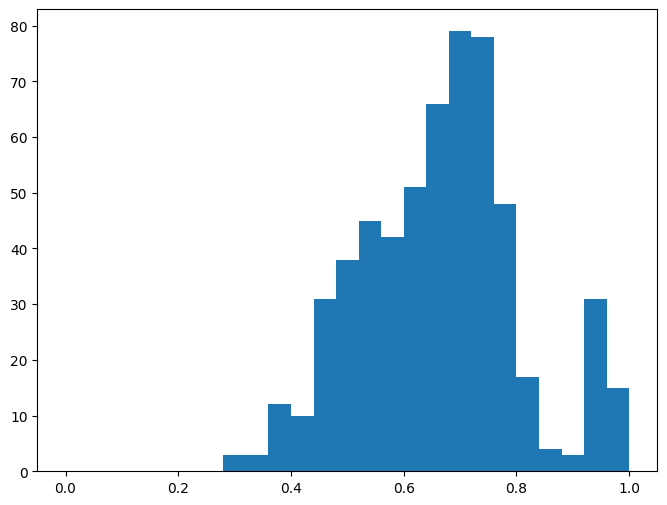

In [6]:
# data file has weights -2*logL w xs (free_nodes) ys (num_nodes) derived_params (omegas at frequencies)
num_nodes = 5
best_idx = np.argmin(data_file[:, 1])
# weights = data_file[:, 0]
ws = equal_file[:, 2]

plt.figure(figsize=(8, 6))
plt.hist(ws, bins=25,range=(0, 1))

# print(data_file[best_idx])



start and end: 3 6 6 11
shapes: omegas: (2807, 50), xs: (2807, 5), ys: (2807, 5)
99.7
95.0
68.0


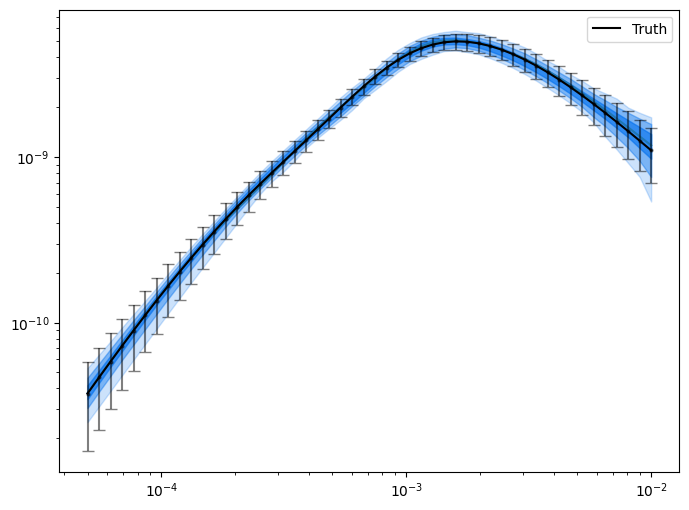

In [5]:
xs_start = 3
xs_end = xs_start + num_nodes - 2
ys_start = xs_end
ys_end = ys_start + num_nodes
xs = data_file[:, xs_start:xs_end]
xs = np.pad(xs, ((0, 0), (1, 1)), 'constant', constant_values=((0, 0), (left_node, right_node)))
ys = data_file[:, ys_start:ys_end]
omega_start = ys_end
print(f'start and end: {xs_start} {xs_end} {ys_start} {ys_end}')
omegas = data_file[:, omega_start:]
print(f"shapes: omegas: {omegas.shape}, xs: {xs.shape}, ys: {ys.shape}")
best_omega = omegas[best_idx]
# plt.loglog()
plt.figure(figsize=(8, 6))
plt.loglog(frequencies,best_omega)
plt.loglog(frequencies, Omegas, color='k', lw=1.5, label='Truth')
plt.errorbar(frequencies, Omegas, yerr=np.sqrt(np.diag(cov)), 
             fmt='o', color='k', capsize=4.,alpha=0.5,markersize=2)


intervals=[99.7, 95., 68.]
interval_cols=[('#006FED', 0.2), ('#006FED', 0.4), ('#006FED', 0.6)]

for j, interval in enumerate(intervals):
    print(interval)
    y_low, y_high = np.percentile(omegas, [50 - interval / 2, 50 + interval / 2], axis=0
                                          ,weights=weights,method='inverted_cdf')
    plt.fill_between(frequencies, y_low, y_high, color=interval_cols[j][0], alpha=interval_cols[j][1])

plt.legend()